In [35]:
import matplotlib.pyplot as plt
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [36]:
# загрузим данные
df = pd.read_csv('data/pokemon.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


## k-means кластеризация

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

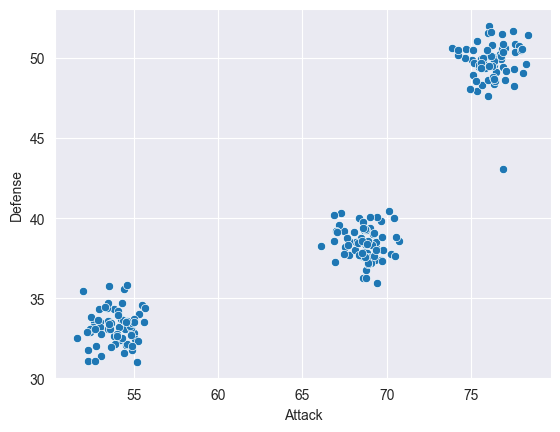

In [37]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['Attack', 'Defense']]

sns.scatterplot(x=X.Attack, y=X.Defense)

Теперь инициализируем алгоритм k-means. Для этого зададим:  
    - n_clusters - количество кластеров  
    - init - стратегию кластеризации  
    - n_init - количество запусков алгоритма k-means  
    - random_state - для того, чтобы результаты от запуска к запуску воспроизводились  

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

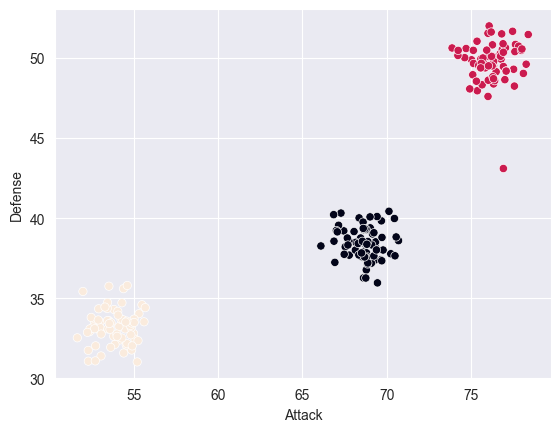

In [38]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)

# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=X.Attack, y=X.Defense, c=predictions)

Вроде неплохо, но давайте посмотрим, может если увеличить количество кластеров станет лучше

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

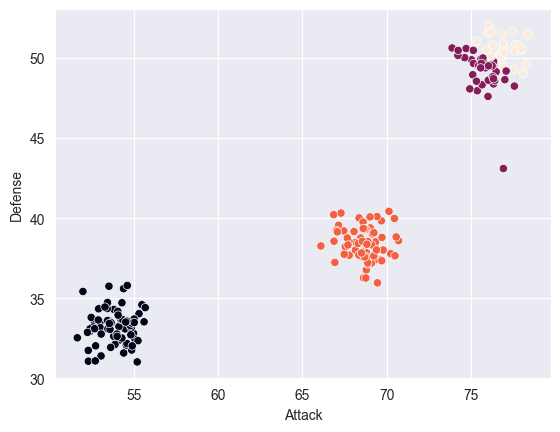

In [39]:
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

Вроде неплохо, но явно есть точки, которые находятся вдалеке от основных кластеров. Например, 2 фиолетовые точки 

In [40]:
# добавляем третий признак - скорость покемона, а алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3_2d'] = predictions

display(predictions)

array([0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1,
       1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 0, 2, 2])

## Выбор количества кластеров с помощью метода локтя

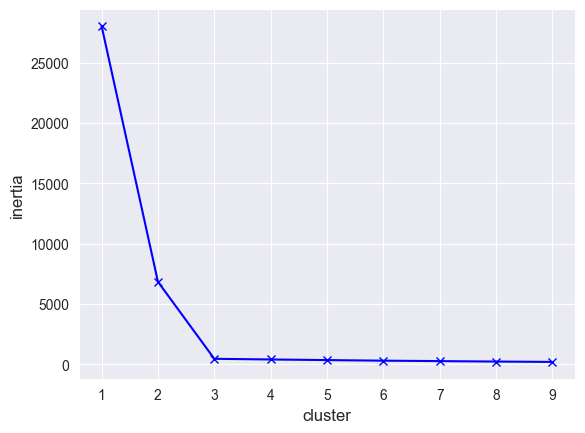

In [41]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42 )
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
inertia = []

# выберем нужные данные 
X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))
    
# сохраним в датафрейм значение инерции и количество кластеров


# установим стиль для визуализиции
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# визуализируем зависимость значения инерции от количества кластеров
plt.plot([i for i in range(1, 10)], inertia, "xb-")


c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

<AxesSubplot: xlabel='cluster', ylabel='inertia'>

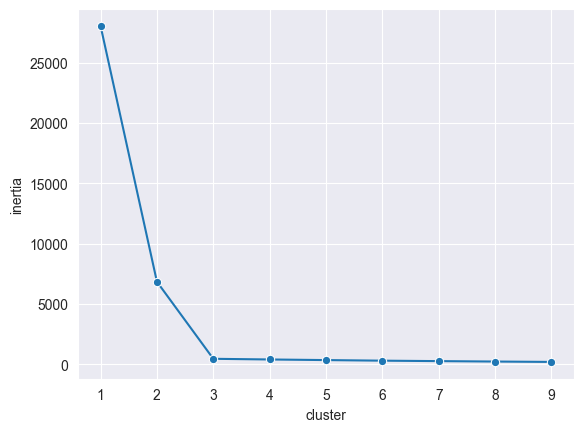

In [42]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

## Выбор количества кластеров с помощью коэффициент силуэта

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

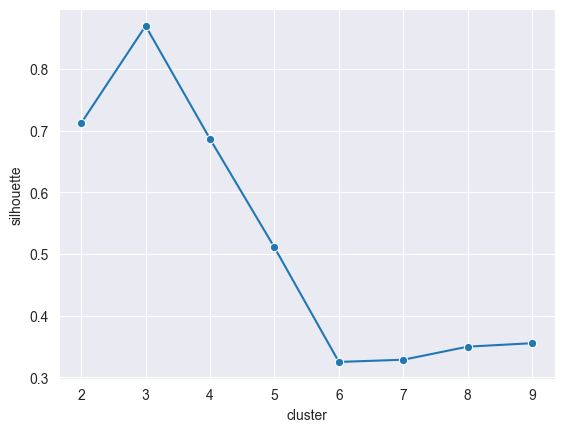

In [43]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

In [44]:
# загрузим данные
pest = pd.read_csv('data/values_from_the_instrument.csv')
pest.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

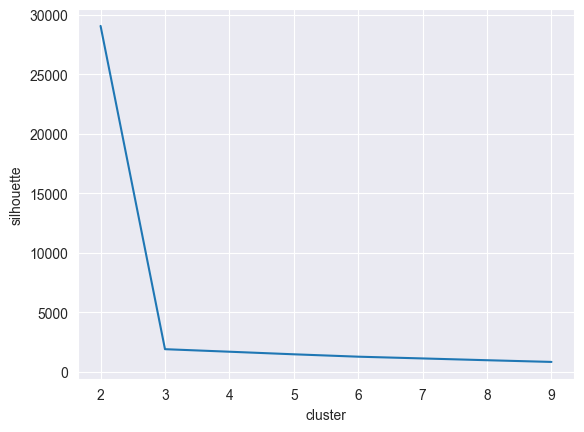

In [45]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette":[], "cluster":[]}
X = pest[['x1', 'x2']]

for cluster_num in range (2, 10):
    silhouette_res['silhouette'].append(get_inertia(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)

sns.lineplot(data=silhouette_df, x="cluster", y="silhouette")


## Метрики

In [46]:
# импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

print(homogeneity_score(labels_true=[1, 1, 0, 0], labels_pred=[1, 1, 0, 0]))

1.0
1.0


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

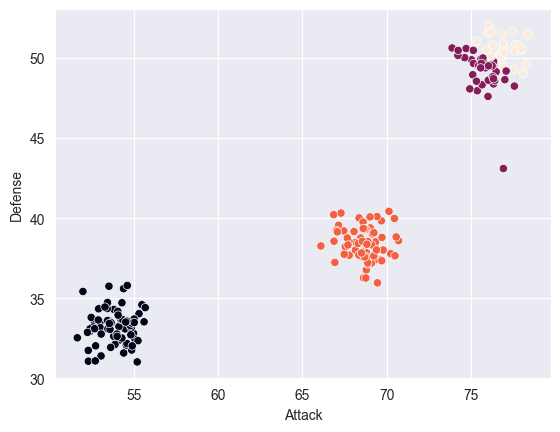

In [58]:
X = df[['Attack', 'Defense']]
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

In [57]:
# теперь посчитаем насколько однородными получились кластеры с покемонами
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


In [59]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы, подсчитываем метрику
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))


1.0


In [60]:
# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.829867483307009


In [61]:
# импортируем из библиотеки sklearn подсчет v-меры
from sklearn.metrics import v_measure_score


# теперь посчитаем v-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


In [62]:
# импортируем из библиотеки sklearn подсчет индекса Рэнда
from sklearn.metrics.cluster import rand_score

# теперь посчитаем насколько полными получились кластеры с покемонами
print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.94643618280843


 Задание 3.3
1 point possible (graded)

Для пяти объектов вы провели кластеризацию k-means. Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.

Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, округлив его до второго знака после точки-разделителя.

In [64]:
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016


## Юнит 2. Другие методы кластеризации

In [67]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering


# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=2, linkage='single' )

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

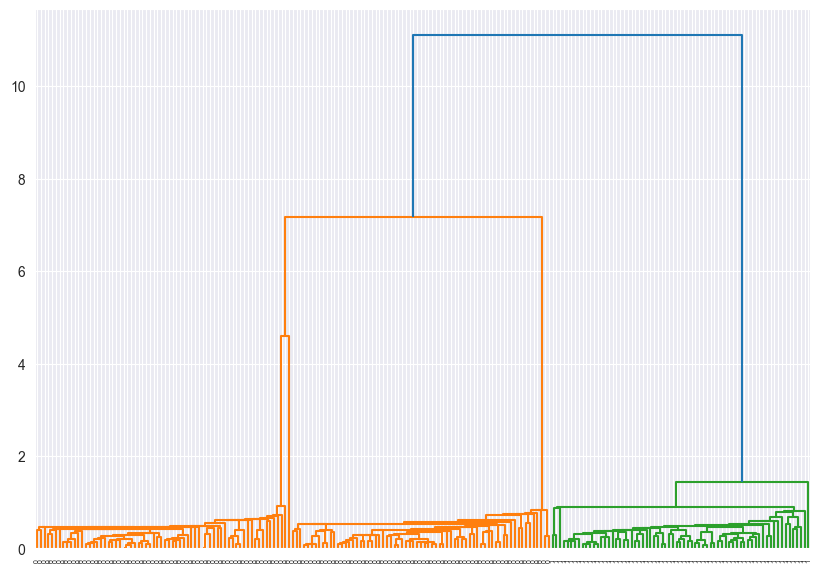

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

## GMM кластеризация

In [79]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture


gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

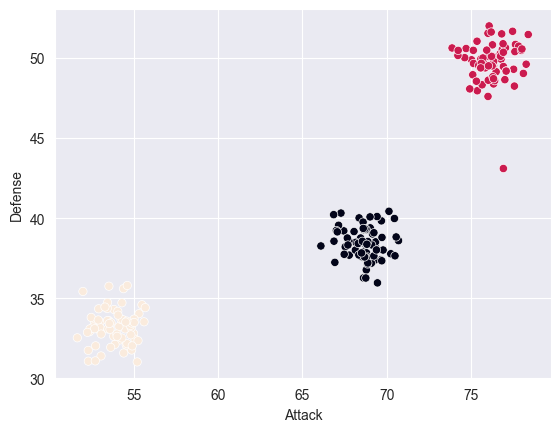

In [80]:
# sns.set_style("white")
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

In [82]:
# загрузим данные
house = pd.read_csv('data/housing.csv')
house.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='year', ylabel='price'>

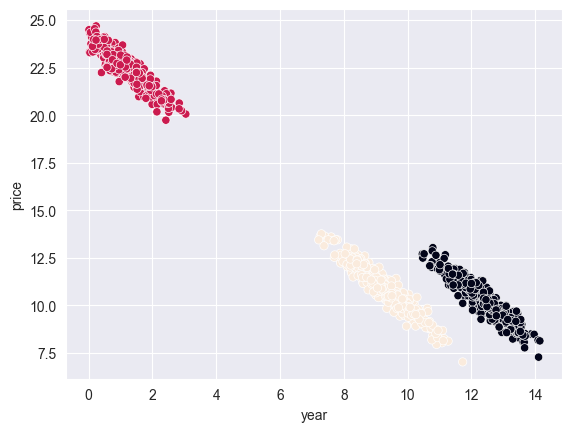

In [85]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

X_h = house[['year', 'price']]
# обучаем модель 
gm_clustering.fit(X_h)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X_h)
sns.scatterplot(x=X_h.year, y=X_h.price, c=gm_prediction)

In [ ]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

X_h = house[['year', 'price']]
# обучаем модель 
gm_clustering.fit(X_h)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X_h)
sns.scatterplot(x=X_h.year, y=X_h.price, c=gm_prediction)

Для датасета из предыдущего задания проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?

<AxesSubplot: xlabel='year', ylabel='price'>

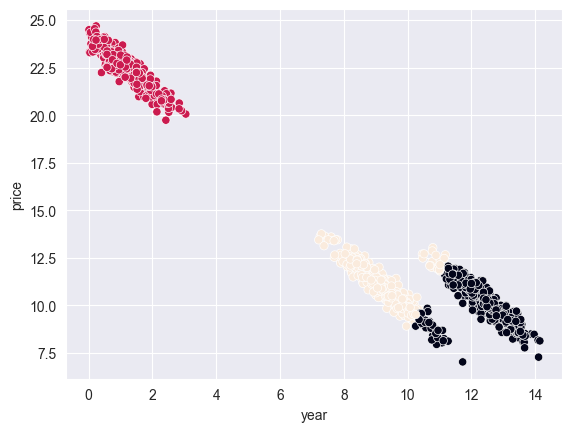

In [86]:
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X_h)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X_h)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=X_h.year, y=X_h.price, c=predictions)

## Спектральная кластеризация

In [81]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_2d
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1,3,0
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0,2,2
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1,1,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,1,3,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,1,3,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,1,3,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,1,1,0
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,0,2,2


In [87]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию 
spectral_clustering = SpectralClustering(n_clusters=4, n_init=1500, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

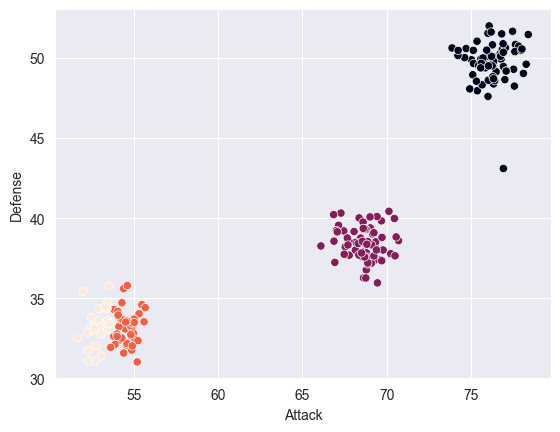

In [88]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

## DBSCAN

In [89]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_2d
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1,3,0
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0,2,2
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1,1,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,1,3,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,1,3,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,1,3,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,1,1,0
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,0,2,2


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

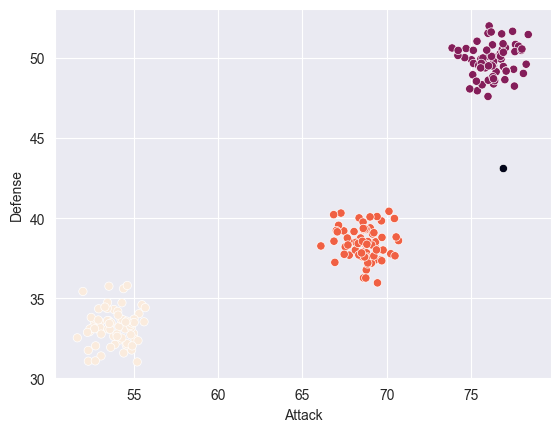

In [90]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?

<AxesSubplot: xlabel='year', ylabel='price'>

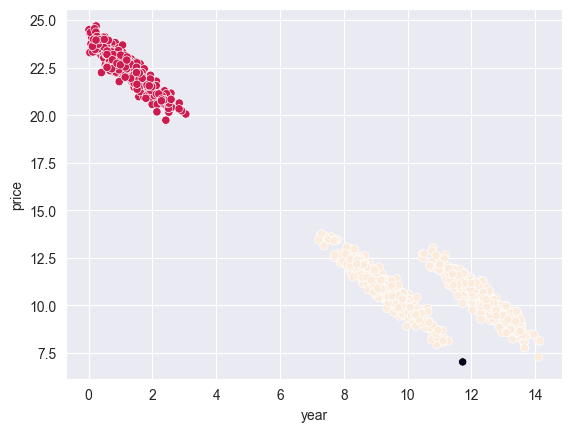

In [97]:
X_h = house[['year', 'price']]
#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=1.15, min_samples=2).fit(X_h)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
sns.scatterplot(x=X_h.year, y=X_h.price, c=clustering.labels_)

## 9. PCA и t-SNE, или зачем понижать размерность?

In [98]:
# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=2, random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)
#pca.fit_transform(X)

array([[-1.53791623e+01, -1.75785186e+00],
       [-2.98130699e-01,  1.70345815e+00],
       [-1.21550937e+01, -8.20419437e-02],
       [-1.54713149e+01, -1.55547869e+00],
       [-5.02838962e-01,  3.47247556e+00],
       [ 1.37978799e+01, -9.48484290e-01],
       [-1.38672909e+01, -1.90460153e+00],
       [ 1.56042734e+01, -2.04379217e+00],
       [ 1.23973059e+01, -3.03803696e+00],
       [ 1.35571148e+01, -4.19682231e-01],
       [-1.02492988e+01,  4.10148415e+00],
       [ 1.42731502e+01, -1.93227169e+00],
       [ 1.36209197e+01, -2.32057076e+00],
       [-1.47947825e+01, -3.60979573e+00],
       [-8.47057375e-01,  2.65027440e+00],
       [-1.50892757e+01, -1.41397822e+00],
       [ 1.44553459e+01, -5.71218663e-01],
       [-1.31112390e+00,  2.34495748e+00],
       [-3.18459401e+00,  2.83858850e+00],
       [ 1.21036156e+01, -1.58541953e+00],
       [-1.27073038e+01, -2.50795483e+00],
       [ 1.37002034e+01, -8.42461471e-02],
       [ 1.44492306e+01, -4.30914860e+00],
       [ 1.

Теперь рассмотрим работу с PCA на практике. Из датасетов sklearn импортируем датасет MNIST — это данные, основанные на рукописном начертании цифр:

In [100]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml('mnist_784');

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [103]:
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=42, test_size=0.1)

In [104]:
# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# создадим объект класса PCA
pca = PCA(n_components=300, random_state=42)
# обучаем модель на данных X
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)



784
300


In [105]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    from time import time
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    return time, score


model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")
    

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 69.0953106880188, метрика модели 0.9208571428571428
Модель, построенная на всех исходных признаках. Время обучения 156.950297832489, метрика модели 0.915


## t-SNE

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет t-SNE (t-distributed Stochastic Neighbor Embedding), что переводится с английского как «стохастическое вложение соседей с t-распределением».

In [112]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
tsne.fit_transform(X)

array([[ 1.5673287e+01, -8.6128628e-03],
       [ 3.1380119e+01, -1.8582033e+01],
       [ 1.7265303e+01,  3.7418827e+01],
       ...,
       [ 4.2213926e+00,  2.0272144e+01],
       [ 1.0282971e+01,  1.1730723e+01],
       [ 2.9228191e+01,  1.6502008e+01]], dtype=float32)


        n_components — размерность нового пространства.
        perplexity — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.
        n_iter — количество итераций для оптимизации.
        random_state — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.


<AxesSubplot: xlabel='0', ylabel='1'>

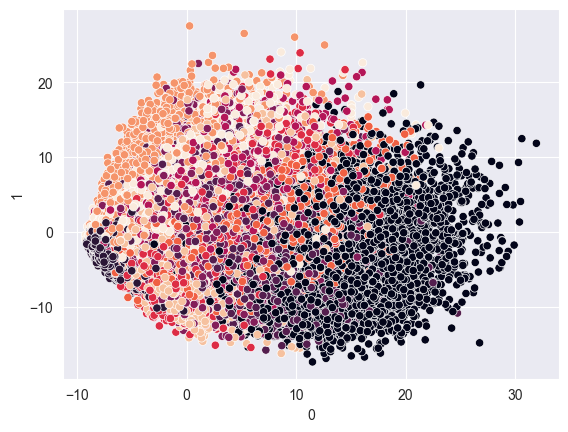

In [113]:
#Уменьшим размерность с помощью PCA:

import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])



<AxesSubplot: xlabel='0', ylabel='1'>

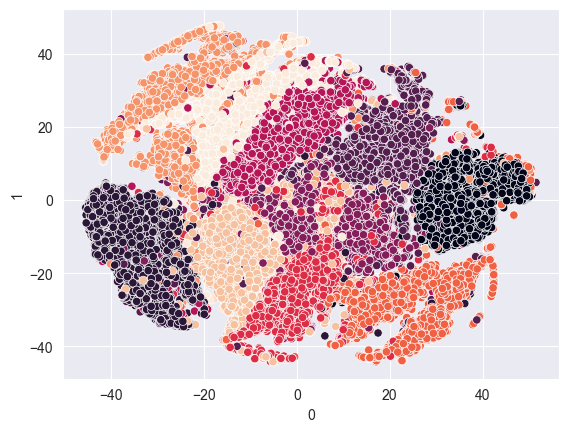

In [114]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеро
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])

## 10. Практика
К нам пришёл заказчик, которому необходимо проанализировать клиентов торгового центра и выделить разные группы покупателей, чтобы понять, как дальше развивать услуги торгового центра, магазины каких сегментов открывать.

В файле содержится основная информация о покупателе: идентификатор, возраст, пол, доход, индекс расходов. Индекс расходов считается на основе таких параметров, как поведение клиента и данные о покупках, и принимает значение от 1 до 100.

Также в файле содержится информация об истинных метках кластеров для клиентов (они нам пригодятся позже).

In [115]:
# импортируем библиотеки для работы с данными
import pandas as pd
from sklearn import preprocessing 

# загрузим данные
df = pd.read_csv("data/segmented_customers.csv")
# посмотрим на данные
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19.0,15.0,39.0,4.0
1,2,Male,21.0,15.0,81.0,3.0
2,3,Female,20.0,16.0,6.0,4.0
3,4,Female,23.0,16.0,77.0,3.0
4,5,Female,31.0,17.0,40.0,4.0


In [116]:
# посмотрим, есть ли пропуски в датасете
df[df.isna().any(axis=1)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
200,201,Female,21.0,NaN,40.0,0.0
201,202,Female,30.0,127.0,NaN,NaN
202,203,Male,80.0,NaN,20.0,NaN
203,204,Male,NaN,16.0,120.0,NaN
204,205,Female,NaN,9.0,80.0,NaN


In [117]:
# пропусков не так много, поэтому мы можем удалить данные с пропусками
df = df.dropna()

# переименуем столбцы для более удобной работы
df.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [118]:
# проверим, есть ли в данных дубликаты
df[df.duplicated(subset=['customer_id'])]

,customer_id,gender,age,annual_income,spending_score,cluster


In [122]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,1,19.0,15.0,39.0,4.0
1,2,1,21.0,15.0,81.0,3.0
2,3,0,20.0,16.0,6.0,4.0
3,4,0,23.0,16.0,77.0,3.0
4,5,0,31.0,17.0,40.0,4.0


In [125]:
import plotly
import plotly.express as px

def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

get_3d_visualization(df, df['cluster'])

In [126]:
X = df[['age', 'annual_income', 'spending_score']]

In [142]:
#запускаем кластеризацию на наших данных
dbscan = DBSCAN(eps=11, min_samples=5)
clustering_dbscan_res = dbscan.fit_predict(X)
df['dbscan_res_eps_11'] = clustering_dbscan_res
print(df['dbscan_res_eps_11'].value_counts())


get_3d_visualization(df, 'dbscan_res_eps_11')

 2    80
-1    55
 3    32
 0    18
 4    10
 1     5
Name: dbscan_res_eps_11, dtype: int64


Проведём агломеративную кластеризацию, чтобы построить дендрограмму и по ней оценить количество кластеров, на которое можно разделить датасет. Напишем функцию, которая будет принимать количество кластеров и матрицу с признаками:

In [143]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

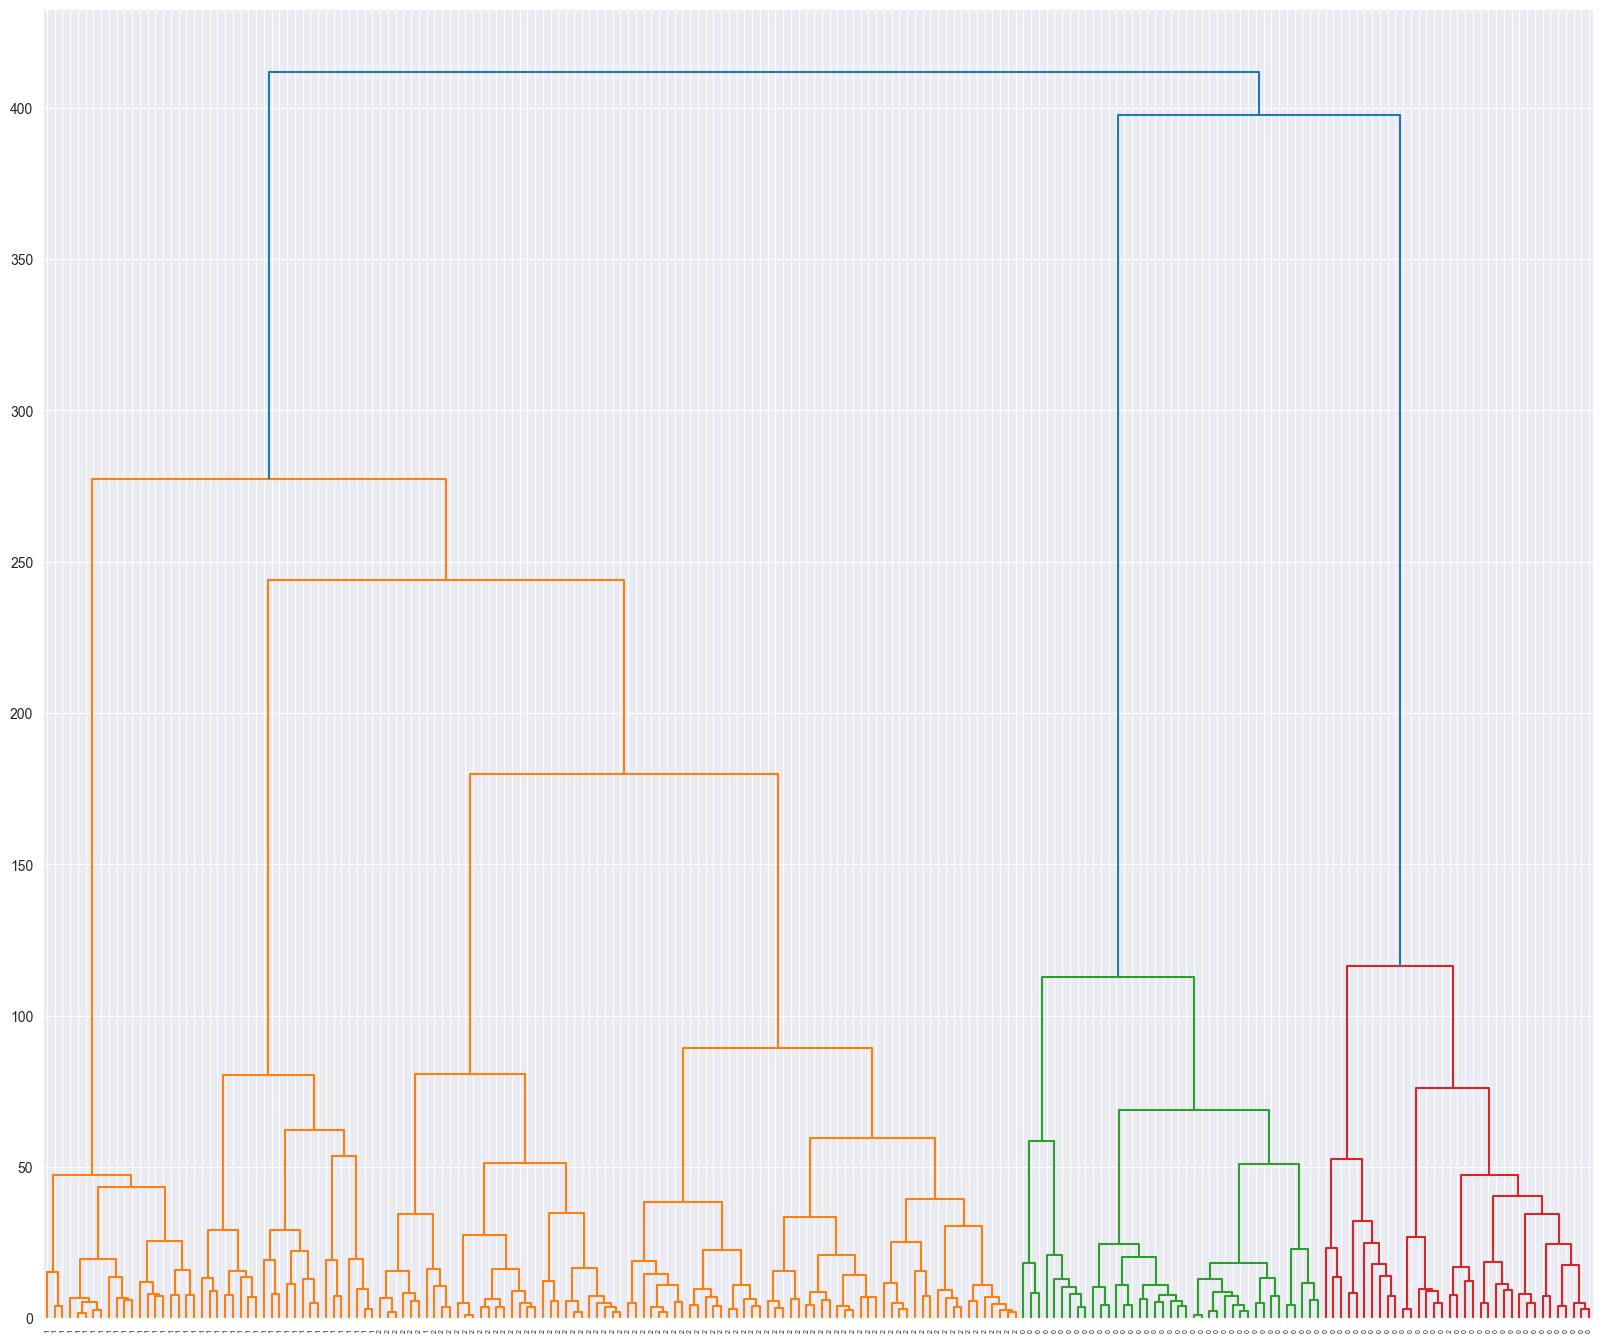

In [147]:
# импортируем библиотеку scipy, чтобы визуализировать дендрограмму
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# запускаем агломеративную кластеризацию и сохраним результаты в df
df['aggl_res_3'] = get_aggl_clustering(df, 3)

# расссчитаем расстояния между кластерами
linked = linkage(X, 'ward')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между друг другом
dendrogram(Z=linked,
           orientation="top",
           labels = df['aggl_res_3'].to_list(),
           distance_sort = 'desceding',
           show_leaf_counts=True 
           )
plt.show()

Как мы можем судить из дендрограммы, если взять евклидово расстояние между кластерами, равное 150, датасет будет делиться на шесть кластеров.

Давайте визуально оценим, что из этого получилось. Для этого обучим модель агломеративной кластеризации с количеством кластеров, равным 6:

In [148]:
df['aggl_res_6'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(df, 'aggl_res_6')

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

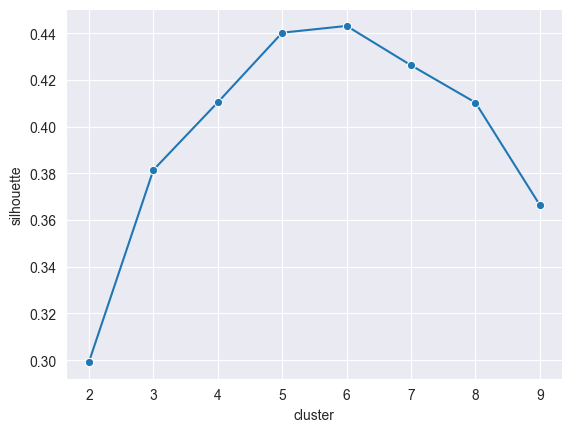

In [149]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# напишем функцию для подсчёта коэффициента силуэта
def get_silhouette_agg_clust(X, cluster_num):
    # проведём агломеративную кластеризацию с заданным количеством кластеров
    res = get_aggl_clustering(X, cluster_num)
    # рассчитаем коэффициент силуэта
    silhouette = silhouette_score(X, res)
    return silhouette


# создадим пустой словарь, ключами будут коэффициент силуэта и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}


for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_agg_clust(X, cluster_num))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

In [151]:
#Метрику полноты можно вызвать из модуля cluster библиотеки sklearn. Метрика рассчитывается следующим образом:

from sklearn.metrics.cluster import completeness_score

print(completeness_score(labels_true=df.cluster, labels_pred=df.aggl_res_6))
print(completeness_score(labels_true=df.cluster, labels_pred=df.aggl_res_3))

0.9012847747610448
0.9212408814794019
